In [0]:
from keras.layers import Input, Dense
from keras.models import Model

In [0]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [0]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist, fashion_mnist
import numpy as np

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [24]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.5287 - val_loss: 0.4583
Epoch 2/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.4264 - val_loss: 0.4053
Epoch 3/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.3935 - val_loss: 0.3855
Epoch 4/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.3761 - val_loss: 0.3706
Epoch 5/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.3631 - val_loss: 0.3594


1. Add one more hidden layer to autoencoder

In [0]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
#addining a hidden layer
hiddenLayer=Dense(512,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hiddenLayer)
# this model maps an input to its reconstruction
autoencoder1 = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder1.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [26]:
autoencoder1.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.4979 - accuracy: 0.4619 - val_loss: 0.4159 - val_accuracy: 0.4881
Epoch 2/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.3916 - accuracy: 0.4920 - val_loss: 0.3765 - val_accuracy: 0.4923
Epoch 3/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.3628 - accuracy: 0.4960 - val_loss: 0.3536 - val_accuracy: 0.4955
Epoch 4/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.3430 - accuracy: 0.5001 - val_loss: 0.3384 - val_accuracy: 0.5009
Epoch 5/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.3320 - accuracy: 0.5021 - val_loss: 0.3285 - val_accuracy: 0.4997


2. visualize the inputand reconstructed representationof the autoencoder using Matplotlib


In [0]:
prediction = autoencoder1.predict(x_test[[2],:])
#prediction

Input Image

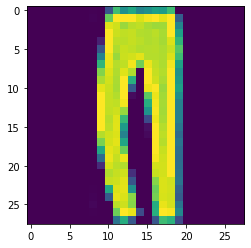

In [28]:
from matplotlib import pyplot as plt
plt.imshow(x_test[2].reshape(28,28))
plt.show()

Reconstructed Image

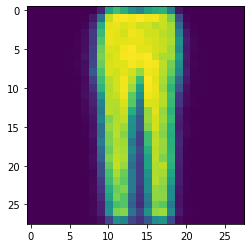

In [29]:
from matplotlib import pyplot as plt
plt.imshow(prediction[0].reshape(28,28))
plt.show()

3. visualize the input, noisy inputand reconstructed representation(denosed output)of the Denosing_Autoencoder using Matplotlib


In [0]:
#Adding Noies
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)


In [31]:
history=autoencoder1.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.3351 - accuracy: 0.5014 - val_loss: 0.3190 - val_accuracy: 1.2755e-07
Epoch 2/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.3303 - accuracy: 0.5020 - val_loss: 0.3169 - val_accuracy: 1.2755e-07
Epoch 3/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.3276 - accuracy: 0.5024 - val_loss: 0.3117 - val_accuracy: 1.2755e-07
Epoch 4/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.3249 - accuracy: 0.5027 - val_loss: 0.3147 - val_accuracy: 1.2755e-07
Epoch 5/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.3232 - accuracy: 0.5030 - val_loss: 0.3096 - val_accuracy: 1.2755e-07
Epoch 6/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.3212 - accuracy: 0.5033 - val_loss: 0.3040 - val_accuracy: 1.2755e-07
Epoch 7/10
60000/60000 [==============

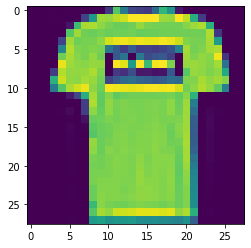

In [34]:
from matplotlib import pyplot as plt
plt.imshow(x_train[1].reshape(28,28))
plt.show()

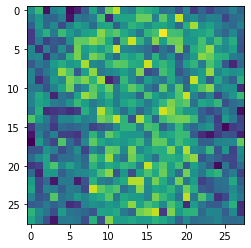

In [35]:
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[1].reshape(28,28))
plt.show()

In [0]:
prediction1 = autoencoder1.predict(x_train_noisy[1:])
#prediction1[0]

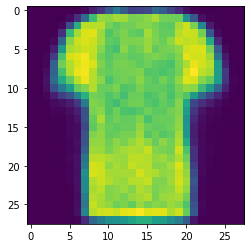

In [38]:
from matplotlib import pyplot as plt
plt.imshow(prediction1[0].reshape(28,28))
plt.show()

4. plot lossand accuracy using the history object

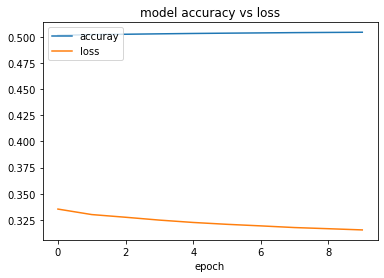

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()

train[0:]
(6000,28,28,3)